In [59]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import os
import seaborn as sns
import pgeocode as pg
import pydotplus

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from tqdm import tqdm

from xgboost import XGBRegressor

# Preparing Current Customer Data

In [2]:
#Importing the current customer dataset
currentCustomers = pd.read_csv('current_customers.csv')
currentCustomers

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,Stock Issuance/Offering,14-May-97,NaN,NaN,Seattle,Washington,98109,United States,37.0,NaN
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,Stock Issuance/Offering,19-Aug-04,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,NaN
2,Y,246280,1989.0,63144419,Over $5 bil.,4862120.0,631444.0,2967787.0,1663794,738000,...,Stock Issuance/Offering,18-Jul-01,NaN,NaN,Dublin,Leinster,D02 P820,Ireland,49.0,NaN
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,NaN,NaN,NaN,NaN,Spring,Texas,77389,United States,28.0,NaN
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,NaN,NaN,NaN,NaN,New York City,New York,10036,United States,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Y,372175531,NaN,3951,$1 mil. - $5 mil.,513.0,39.0,209.0,30,13,...,NaN,NaN,NaN,NaN,Sherwood,Oregon,97140,United States,1.0,NaN
325,Y,347198798,2008.0,1654,$1 mil. - $5 mil.,133.0,24.0,61.0,18,8,...,NaN,NaN,NaN,NaN,Kansas City,Missouri,64106,United States,1.0,NaN
326,Y,32080939,2001.0,232,"Under $500,000",18.0,3.0,8.0,4,2,...,NaN,NaN,NaN,NaN,Atlanta,Georgia,30342,United States,1.0,NaN
327,Y,39371338,2002.0,1946,$1 mil. - $5 mil.,251.0,19.0,54.0,34,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Appending the Latitudes and Longitudes of the company zipcodes to the customer data
nomi = pg.Nominatim('US') 
currentCustomers['Latitude'] = (nomi.query_postal_code(currentCustomers['Company_Zip_Code'].to_list()).latitude)
currentCustomers['Longitude'] = (nomi.query_postal_code(currentCustomers['Company_Zip_Code'].to_list()).longitude)
currentCustomers

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Latitude,Longitude
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,NaN,NaN,Seattle,Washington,98109,United States,37.0,NaN,47.6339,-122.3476
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,NaN,37.4056,-122.0775
2,Y,246280,1989.0,63144419,Over $5 bil.,4862120.0,631444.0,2967787.0,1663794,738000,...,NaN,NaN,Dublin,Leinster,D02 P820,Ireland,49.0,NaN,NaN,NaN
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,NaN,NaN,Spring,Texas,77389,United States,28.0,NaN,30.1044,-95.5066
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,NaN,NaN,New York City,New York,10036,United States,55.0,NaN,40.7597,-73.9918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Y,372175531,NaN,3951,$1 mil. - $5 mil.,513.0,39.0,209.0,30,13,...,NaN,NaN,Sherwood,Oregon,97140,United States,1.0,NaN,45.3514,-122.8567
325,Y,347198798,2008.0,1654,$1 mil. - $5 mil.,133.0,24.0,61.0,18,8,...,NaN,NaN,Kansas City,Missouri,64106,United States,1.0,NaN,39.1052,-94.5699
326,Y,32080939,2001.0,232,"Under $500,000",18.0,3.0,8.0,4,2,...,NaN,NaN,Atlanta,Georgia,30342,United States,1.0,NaN,33.8842,-84.3761
327,Y,39371338,2002.0,1946,$1 mil. - $5 mil.,251.0,19.0,54.0,34,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Filtering down to American customers
customersAmerican = pd.DataFrame(currentCustomers[currentCustomers['Company_Country'] == 'United States'])
customersAmerican

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Latitude,Longitude
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,NaN,NaN,Seattle,Washington,98109,United States,37.0,NaN,47.6339,-122.3476
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,NaN,37.4056,-122.0775
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,NaN,NaN,Spring,Texas,77389,United States,28.0,NaN,30.1044,-95.5066
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,NaN,NaN,New York City,New York,10036,United States,55.0,NaN,40.7597,-73.9918
5,Y,105562330,1994.0,79571000,Over $5 bil.,6445251.0,1193565.0,2944127.0,160066,71000,...,Undisclosed,Undisclosed;Undisclosed;Undisclosed;Undisclose...,Bellevue,Washington,98006,United States,81.0,NaN,47.5614,-122.1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Y,366182431,2013.0,1167,$1 mil. - $5 mil.,151.0,11.0,61.0,14,6,...,NaN,NaN,Kansas City,Kansas,66101,United States,2.0,NaN,39.1157,-94.6271
324,Y,372175531,NaN,3951,$1 mil. - $5 mil.,513.0,39.0,209.0,30,13,...,NaN,NaN,Sherwood,Oregon,97140,United States,1.0,NaN,45.3514,-122.8567
325,Y,347198798,2008.0,1654,$1 mil. - $5 mil.,133.0,24.0,61.0,18,8,...,NaN,NaN,Kansas City,Missouri,64106,United States,1.0,NaN,39.1052,-94.5699
326,Y,32080939,2001.0,232,"Under $500,000",18.0,3.0,8.0,4,2,...,NaN,NaN,Atlanta,Georgia,30342,United States,1.0,NaN,33.8842,-84.3761


In [6]:
#creating a dataset of the numerical features, which will be our primary dataset
customersPrimary = pd.DataFrame(customersAmerican.select_dtypes(include=['int64', 'float64']))
customersPrimary

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,SIC_Code_1,SIC_Code_2,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations,Latitude,Longitude
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,8999,5961,458210,458110,11.0,48000,48000,37.0,47.6339,-122.3476
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,7389,7379,541519,541512,1.0,1925100,1900000,91.0,37.4056,-122.0775
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,1311,131,325110,211120,71652.0,0,0,28.0,30.1044,-95.5066
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,4899,4813,517312,517121,543.0,0,0,55.0,40.7597,-73.9918
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,7375,6719,551112,517312,230.0,38154100,4000000,81.0,47.5614,-122.1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,4813,481,517311,517111,NaN,0,0,2.0,39.1157,-94.6271
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,4841,484,516210,515210,9996367.0,0,0,1.0,45.3514,-122.8567
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,7374,737,518210,51821,2877105.0,0,0,1.0,39.1052,-94.5699
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,7537,753,811114,811113,NaN,0,0,1.0,33.8842,-84.3761


In [7]:
#Dropping companies with missing coordiantes
customersPrimary.dropna(subset=['Latitude'], inplace=True)

# Preparing the Current Billing data

In [8]:
#Importing current billing data
currentBilling = pd.read_csv('current_billing.csv')
currentBilling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CompanyID                  328 non-null    int64  
 1   Lifetime_Park Place        54 non-null     float64
 2   Lifetime_Boardwalk         64 non-null     float64
 3   Lifetime_StJamesPlace      110 non-null    float64
 4   Lifetime_Marvin Gardens    78 non-null     float64
 5   Lifetime_Ventnor           23 non-null     float64
 6   Lifetime_Kentucky          31 non-null     float64
 7   Lifetime_Tennessee         131 non-null    float64
 8   Lifetime_Pennslyvania      0 non-null      float64
 9   Last_Month_Park Place      53 non-null     float64
 10  Last_Month_Boardwalk       62 non-null     float64
 11  Last_Month_StJamesPlace    110 non-null    float64
 12  Last_Month_Marvin Gardens  77 non-null     float64
 13  Last_Month_Ventnor         23 non-null     float64

In [9]:
#Calculating the total lifetime and total monthly spend for each company across all locations
#Also calculating number of locations for whhich billing data is non-zero

currentBilling = currentBilling.iloc[...,0:].fillna(0)

totalLifeSpend = currentBilling.iloc[...,1:9].sum(axis = 1)
num_locations_month = currentBilling.iloc[...,9:].astype(bool).sum(axis=1)
currentBilling['num_locations_month'] = num_locations_month
currentBilling['Total_Lifetime_Spend'] = totalLifeSpend

num_locations_life = currentBilling.iloc[...,1:9].astype(bool).sum(axis=1)
currentBilling['num_locations_life'] = num_locations_life
totalMonthSpend = currentBilling.iloc[...,9:].sum(axis = 1)
currentBilling['Total_Monthly_Spend'] = totalMonthSpend

In [10]:
#Joining the current billing total data to the current customer data
americanBilling = customersPrimary.join(currentBilling.set_index('CompanyID'), on = 'CompanyID', how = 'left')
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.000000,0.798386,0.000000,0.000000,1.037185,0.0,4.0,2.630822,4.0,12.232555
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.121411,0.0,2.0,0.138103,2.0,3.906652
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,4.937410,0.000000,0.000000,0.000000,0.000000,0.0,1.0,13.025724,1.0,19.963135
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0.860277,3.875073,0.175216,-0.051244,0.348938,0.0,7.0,25.470047,7.0,47.514474
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0.000000,1.001373,0.000000,0.000000,0.088732,0.0,2.0,5.118092,2.0,10.208197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.130036,0.0,1.0,0.004252,1.0,1.874216
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.005658,1.0,1.904806
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.135548,0.0,1.0,-0.027666,1.0,1.836786
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,-0.135046,0.000000,0.000000,0.000000,0.000000,0.0,1.0,-0.043088,1.0,1.821865


# Preparing Prospect Data

In [11]:
#Importing the prospect list dataset
prospectList = pd.read_csv('prospect_list.csv')
prospectList

,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Share Placement,16-May-16,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,NaN
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,Stock Issuance/Offering,1-Mar-72,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,NaN
2,N,24904409,1975.0,(425) 882-8080,(425) 936-7329,204094000.0,Over $5 bil.,26736314.0,2040940.0,7551478.0,...,Other Financing Round,1-Sep-81,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,63.0,NaN
3,N,10256729,1963.0,(401) 765-1500,NaN,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,NaN,NaN,NaN,NaN,Woonsocket,Rhode Island,2895,United States,31.0,NaN
4,N,141738322,1938.0,+82 312001114,(82)31-200-7538,214420431.0,Over $5 bil.,17368054.0,3216306.0,7933555.0,...,NaN,NaN,NaN,NaN,Suwon-si,Gyeonggi-do,16677,South Korea,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,N,398742609,2014.0,(269) 350-3242,NaN,1643.0,$1 mil. - $5 mil.,215.0,16.0,57.0,...,NaN,NaN,NaN,NaN,Gaylord,Michigan,49734,United States,NaN,NaN
1925,N,30344865,1932.0,(800) 442-2253,NaN,1204.0,$1 mil. - $5 mil.,156.0,12.0,63.0,...,NaN,NaN,NaN,NaN,Manhattan,Illinois,60442,United States,1.0,NaN
1926,N,478996006,2019.0,(703) 594-6825,NaN,956.0,"$500,000 - $1 mil.",125.0,9.0,33.0,...,NaN,NaN,NaN,NaN,Vienna,Virginia,22182,United States,1.0,NaN
1927,N,500997527,2002.0,(765) 553-5494,NaN,1144.0,$1 mil. - $5 mil.,92.0,17.0,42.0,...,NaN,NaN,NaN,NaN,Kokomo,Indiana,46901,United States,1.0,NaN


In [12]:
#Appending the Latitudes and Longitudes of the company zipcodes to the prospect data
nomi = pg.Nominatim('US') 
prospectList['Latitude'] = (nomi.query_postal_code(prospectList['Company_Zip_Code'].to_list()).latitude)
prospectList['Longitude'] = (nomi.query_postal_code(prospectList['Company_Zip_Code'].to_list()).longitude)
prospectList

,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Latitude,Longitude
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,NaN,37.3180,-122.0449
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,NaN,36.3729,-94.2088
2,N,24904409,1975.0,(425) 882-8080,(425) 936-7329,204094000.0,Over $5 bil.,26736314.0,2040940.0,7551478.0,...,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,63.0,NaN,47.6718,-122.1232
3,N,10256729,1963.0,(401) 765-1500,NaN,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,NaN,NaN,Woonsocket,Rhode Island,2895,United States,31.0,NaN,NaN,NaN
4,N,141738322,1938.0,+82 312001114,(82)31-200-7538,214420431.0,Over $5 bil.,17368054.0,3216306.0,7933555.0,...,NaN,NaN,Suwon-si,Gyeonggi-do,16677,South Korea,30.0,NaN,40.8136,-78.2390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,N,398742609,2014.0,(269) 350-3242,NaN,1643.0,$1 mil. - $5 mil.,215.0,16.0,57.0,...,NaN,NaN,Gaylord,Michigan,49734,United States,NaN,NaN,45.0275,-84.6748
1925,N,30344865,1932.0,(800) 442-2253,NaN,1204.0,$1 mil. - $5 mil.,156.0,12.0,63.0,...,NaN,NaN,Manhattan,Illinois,60442,United States,1.0,NaN,41.4289,-87.9771
1926,N,478996006,2019.0,(703) 594-6825,NaN,956.0,"$500,000 - $1 mil.",125.0,9.0,33.0,...,NaN,NaN,Vienna,Virginia,22182,United States,1.0,NaN,38.9280,-77.2649
1927,N,500997527,2002.0,(765) 553-5494,NaN,1144.0,$1 mil. - $5 mil.,92.0,17.0,42.0,...,NaN,NaN,Kokomo,Indiana,46901,United States,1.0,NaN,40.4988,-86.1453


In [13]:
#Filtering down to American prospects
prospectsAmerican = pd.DataFrame(prospectList[prospectList['Company_Country'] == 'United States'])
prospectsAmerican

,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Latitude,Longitude
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,NaN,37.3180,-122.0449
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,NaN,36.3729,-94.2088
2,N,24904409,1975.0,(425) 882-8080,(425) 936-7329,204094000.0,Over $5 bil.,26736314.0,2040940.0,7551478.0,...,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,63.0,NaN,47.6718,-122.1232
3,N,10256729,1963.0,(401) 765-1500,NaN,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,NaN,NaN,Woonsocket,Rhode Island,2895,United States,31.0,NaN,NaN,NaN
5,N,19513364,1968.0,(408) 765-8080,(503) 613-7292,63100000.0,Over $5 bil.,7698200.0,631000.0,1262000.0,...,NaN,NaN,Santa Clara,California,95052,United States,30.0,NaN,37.3522,-121.9583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,N,398742609,2014.0,(269) 350-3242,NaN,1643.0,$1 mil. - $5 mil.,215.0,16.0,57.0,...,NaN,NaN,Gaylord,Michigan,49734,United States,NaN,NaN,45.0275,-84.6748
1925,N,30344865,1932.0,(800) 442-2253,NaN,1204.0,$1 mil. - $5 mil.,156.0,12.0,63.0,...,NaN,NaN,Manhattan,Illinois,60442,United States,1.0,NaN,41.4289,-87.9771
1926,N,478996006,2019.0,(703) 594-6825,NaN,956.0,"$500,000 - $1 mil.",125.0,9.0,33.0,...,NaN,NaN,Vienna,Virginia,22182,United States,1.0,NaN,38.9280,-77.2649
1927,N,500997527,2002.0,(765) 553-5494,NaN,1144.0,$1 mil. - $5 mil.,92.0,17.0,42.0,...,NaN,NaN,Kokomo,Indiana,46901,United States,1.0,NaN,40.4988,-86.1453


In [14]:
#creating a dataset of the numerical features, which will be our primary prospect dataset
prospectsPrimary = pd.DataFrame(prospectsAmerican.select_dtypes(include=['int64', 'float64']))
prospectsPrimary

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,SIC_Code_1,SIC_Code_2,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations,Latitude,Longitude
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,8732,5045.0,423430,334220,89.0,2162250,1000000,23.0,37.3180,-122.0449
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,6719,5411.0,551114,455110,81.0,6850,3000,4202.0,36.3729,-94.2088
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,7389,7379.0,518210,513210,44.0,1000,1000,63.0,47.6718,-122.1232
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,8093,8049.0,812199,621498,454.0,0,0,31.0,NaN,NaN
5,19513364,1968.0,63100000.0,7698200.0,631000.0,1262000.0,297363,131900,33.8,69.2,3674,3577.0,334418,334413,2717.0,6800,6800,30.0,37.3522,-121.9583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,7371,738.0,541511,54151,10939808.0,0,0,NaN,45.0275,-84.6748
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,4841,484.0,516210,515210,NaN,0,0,1.0,41.4289,-87.9771
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,7379,737.0,541512,54151,NaN,0,0,1.0,38.9280,-77.2649
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,4813,481.0,517311,517111,NaN,0,0,1.0,40.4988,-86.1453


In [15]:
#Dropping prospective companies with missing coordiantes
prospectsPrimary.dropna(subset=['Latitude'], inplace=True)

# Assigning cluster labels to current customer data

In [16]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(americanBilling[['Latitude', 'Longitude']])
americanBilling['km_Labels'] = kmeans.labels_
americanBilling

/Users/josephgallagher/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.798386,0.000000,0.000000,1.037185,0.0,4.0,2.630822,4.0,12.232555,6
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.000000,0.000000,0.000000,-0.121411,0.0,2.0,0.138103,2.0,3.906652,6
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,13.025724,1.0,19.963135,3
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,3.875073,0.175216,-0.051244,0.348938,0.0,7.0,25.470047,7.0,47.514474,1
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,1.001373,0.000000,0.000000,0.088732,0.0,2.0,5.118092,2.0,10.208197,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.000000,0.000000,0.000000,-0.130036,0.0,1.0,0.004252,1.0,1.874216,0
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.005658,1.0,1.904806,6
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0.000000,0.000000,0.000000,-0.135548,0.0,1.0,-0.027666,1.0,1.836786,0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,-0.043088,1.0,1.821865,4


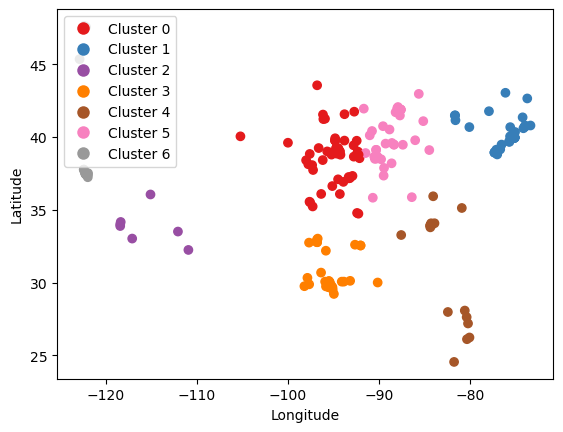

In [17]:
#Inspecting scatterplot of customer locations by K-Means cluster
scatter = plt.scatter(x=americanBilling['Longitude'], y=americanBilling['Latitude'],c = americanBilling['km_Labels'], cmap = 'Set1')
size = 81
lp = lambda i: plt.plot([],color=scatter.cmap(scatter.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Cluster {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(americanBilling['km_Labels'])]
plt.legend(handles = handles)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# ADJUST THE BELOW BLOCK TO REFLECT IN/OUT OF MARKET EACH TIME CODE IS RUN
# A = IN MARKET, B = OUT OF MARKET
# IN MARKET = TEXAS, MIDWEST, RUST BELT, NORTHEAST

In [18]:
#Setting a binary In/Out of Market column
americanBilling['In_Out_Market'] = americanBilling['km_Labels']
americanBilling['In_Out_Market'].replace(0, 'a', inplace=True)
americanBilling['In_Out_Market'].replace(1, 'a', inplace=True)
americanBilling['In_Out_Market'].replace(3, 'a', inplace=True)
americanBilling['In_Out_Market'].replace(5, 'a', inplace=True)
americanBilling['In_Out_Market'].replace(2, 'b', inplace=True)
americanBilling['In_Out_Market'].replace(4, 'b', inplace=True)
americanBilling['In_Out_Market'].replace(6, 'b', inplace=True)
americanBilling['In_Out_Market'].replace('a', 1, inplace=True)
americanBilling['In_Out_Market'].replace('b', 0, inplace=True)
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.000000,0.000000,1.037185,0.0,4.0,2.630822,4.0,12.232555,6,0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.000000,0.000000,-0.121411,0.0,2.0,0.138103,2.0,3.906652,6,0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.000000,0.000000,0.000000,0.0,1.0,13.025724,1.0,19.963135,3,1
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0.175216,-0.051244,0.348938,0.0,7.0,25.470047,7.0,47.514474,1,1
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0.000000,0.000000,0.088732,0.0,2.0,5.118092,2.0,10.208197,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.000000,0.000000,-0.130036,0.0,1.0,0.004252,1.0,1.874216,0,1
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.005658,1.0,1.904806,6,0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0.000000,0.000000,-0.135548,0.0,1.0,-0.027666,1.0,1.836786,0,1
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,-0.043088,1.0,1.821865,4,0


# Assigning Cluster Labels to prospect data

In [20]:
kmeans.fit(prospectsPrimary[['Latitude', 'Longitude']])
prospectsPrimary['km_Labels'] = kmeans.labels_
prospectsPrimary

/Users/josephgallagher/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,SIC_Code_2,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations,Latitude,Longitude,km_Labels
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,...,5045.0,423430,334220,89.0,2162250,1000000,23.0,37.3180,-122.0449,1
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,...,5411.0,551114,455110,81.0,6850,3000,4202.0,36.3729,-94.2088,5
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,...,7379.0,518210,513210,44.0,1000,1000,63.0,47.6718,-122.1232,4
5,19513364,1968.0,63100000.0,7698200.0,631000.0,1262000.0,297363,131900,33.8,69.2,...,3577.0,334418,334413,2717.0,6800,6800,30.0,37.3522,-121.9583,1
6,18579882,1911.0,60533000.0,7929823.0,605330.0,2118655.0,586160,260000,0.0,-4.2,...,8748.0,541618,541512,2298.0,0,0,54.0,41.1360,-73.7009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,...,738.0,541511,54151,10939808.0,0,0,NaN,45.0275,-84.6748,3
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,...,484.0,516210,515210,NaN,0,0,1.0,41.4289,-87.9771,3
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,...,737.0,541512,54151,NaN,0,0,1.0,38.9280,-77.2649,2
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,...,481.0,517311,517111,NaN,0,0,1.0,40.4988,-86.1453,3


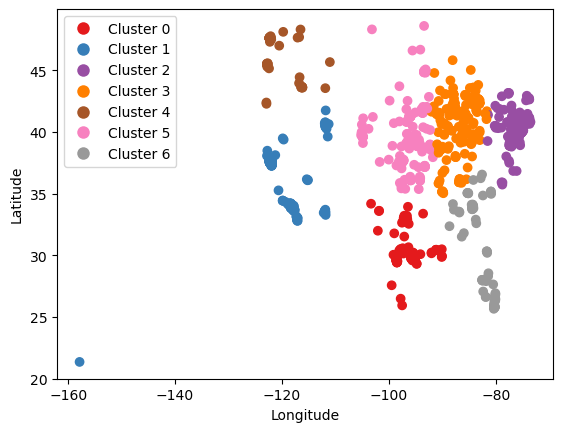

In [21]:
#Inspecting scatterplot of customer locations by K-Means cluster
scatter = plt.scatter(x=prospectsPrimary['Longitude'], y=prospectsPrimary['Latitude'],c = prospectsPrimary['km_Labels'], cmap = 'Set1')
size = 81
lp = lambda i: plt.plot([],color=scatter.cmap(scatter.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Cluster {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(prospectsPrimary['km_Labels'])]
plt.legend(handles = handles)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [22]:
#Setting a binary In/Out of Market column
prospectsPrimary['In_Out_Market'] = prospectsPrimary['km_Labels']
prospectsPrimary['In_Out_Market'].replace(0, 'a', inplace=True)
prospectsPrimary['In_Out_Market'].replace(2, 'a', inplace=True)
prospectsPrimary['In_Out_Market'].replace(3, 'a', inplace=True)
prospectsPrimary['In_Out_Market'].replace(5, 'a', inplace=True)
prospectsPrimary['In_Out_Market'].replace(1, 'b', inplace=True)
prospectsPrimary['In_Out_Market'].replace(4, 'b', inplace=True)
prospectsPrimary['In_Out_Market'].replace(6, 'b', inplace=True)
prospectsPrimary['In_Out_Market'].replace('a', 1, inplace=True)
prospectsPrimary['In_Out_Market'].replace('b', 0, inplace=True)
prospectsPrimary

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations,Latitude,Longitude,km_Labels,In_Out_Market
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,...,423430,334220,89.0,2162250,1000000,23.0,37.3180,-122.0449,1,0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,...,551114,455110,81.0,6850,3000,4202.0,36.3729,-94.2088,5,1
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,...,518210,513210,44.0,1000,1000,63.0,47.6718,-122.1232,4,0
5,19513364,1968.0,63100000.0,7698200.0,631000.0,1262000.0,297363,131900,33.8,69.2,...,334418,334413,2717.0,6800,6800,30.0,37.3522,-121.9583,1,0
6,18579882,1911.0,60533000.0,7929823.0,605330.0,2118655.0,586160,260000,0.0,-4.2,...,541618,541512,2298.0,0,0,54.0,41.1360,-73.7009,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,398742609,2014.0,1643.0,215.0,16.0,57.0,11,5,0.0,0.0,...,541511,54151,10939808.0,0,0,NaN,45.0275,-84.6748,3,1
1925,30344865,1932.0,1204.0,156.0,12.0,63.0,14,6,0.0,0.0,...,516210,515210,NaN,0,0,1.0,41.4289,-87.9771,3,1
1926,478996006,2019.0,956.0,125.0,9.0,33.0,17,6,0.0,0.0,...,541512,54151,NaN,0,0,1.0,38.9280,-77.2649,2,1
1927,500997527,2002.0,1144.0,92.0,17.0,42.0,11,5,0.0,0.0,...,517311,517111,NaN,0,0,1.0,40.4988,-86.1453,3,1


# Creating derived statistics for current customers and prospects

In [23]:
#Creating an IT budget to revenue ratio for current American customers
americanBilling['IT_to_Revenue'] = americanBilling['Est_IT_Department_Budget_(in_000s_USD)'] / americanBilling['Revenue_(in_000s_USD)']
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.000000,1.037185,0.0,4.0,2.630822,4.0,12.232555,6,0,0.028000
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.000000,-0.121411,0.0,2.0,0.138103,2.0,3.906652,6,0,0.028000
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.000000,0.000000,0.0,1.0,13.025724,1.0,19.963135,3,1,0.029000
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,-0.051244,0.348938,0.0,7.0,25.470047,7.0,47.514474,1,1,0.037000
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0.000000,0.088732,0.0,2.0,5.118092,2.0,10.208197,6,0,0.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.000000,-0.130036,0.0,1.0,0.004252,1.0,1.874216,0,1,0.052271
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.000000,0.000000,0.0,1.0,0.005658,1.0,1.904806,6,0,0.052898
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0.000000,-0.135548,0.0,1.0,-0.027666,1.0,1.836786,0,1,0.036880
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0.000000,0.000000,0.0,1.0,-0.043088,1.0,1.821865,4,0,0.034483


In [24]:
#Creating Total Budget Field for American Customers
Total_Budget = americanBilling.iloc[...,3:7].sum(axis = 1)
americanBilling['Total_Budget'] = Total_Budget
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_Tennessee,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,1.037185,0.0,4.0,2.630822,4.0,12.232555,6,0,0.028000,93895109.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,-0.121411,0.0,2.0,0.138103,2.0,3.906652,6,0,0.028000,43102835.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.000000,0.0,1.0,13.025724,1.0,19.963135,3,1,0.029000,32546011.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0.348938,0.0,7.0,25.470047,7.0,47.514474,1,1,0.037000,18452682.0
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0.088732,0.0,2.0,5.118092,2.0,10.208197,6,0,0.037000,10743009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,-0.130036,0.0,1.0,0.004252,1.0,1.874216,0,1,0.052271,237.0
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.000000,0.0,1.0,0.005658,1.0,1.904806,6,0,0.052898,791.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,-0.135548,0.0,1.0,-0.027666,1.0,1.836786,0,1,0.036880,236.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0.000000,0.0,1.0,-0.043088,1.0,1.821865,4,0,0.034483,33.0


In [25]:
#Creating Total Budget to Revenue Ratio for American customers
Total_Budget_to_Revenue = americanBilling['Total_Budget']/americanBilling['Revenue_(in_000s_USD)']
americanBilling['Total_Budget_to_Revenue'] = Total_Budget_to_Revenue
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Last_Month_Pennslyvania,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0.0,4.0,2.630822,4.0,12.232555,6,0,0.028000,93895109.0,0.174511
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.0,2.0,0.138103,2.0,3.906652,6,0,0.028000,43102835.0,0.167888
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,0.0,1.0,13.025724,1.0,19.963135,3,1,0.029000,32546011.0,0.089384
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,0.0,7.0,25.470047,7.0,47.514474,1,1,0.037000,18452682.0,0.134854
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0.0,2.0,5.118092,2.0,10.208197,6,0,0.037000,10743009.0,0.135012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.0,1.0,0.004252,1.0,1.874216,0,1,0.052271,237.0,0.203085
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.0,1.0,0.005658,1.0,1.904806,6,0,0.052898,791.0,0.200202
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,0.0,1.0,-0.027666,1.0,1.836786,0,1,0.036880,236.0,0.142684
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0.0,1.0,-0.043088,1.0,1.821865,4,0,0.034483,33.0,0.142241


In [26]:
#Creating Revenue to funding Ratio for American customers
Total_Fund_to_Rev = americanBilling['Total_Funding_Amount_(in_000s_USD)']/americanBilling['Revenue_(in_000s_USD)']
americanBilling['Total_Fund_to_Rev'] = Total_Fund_to_Rev
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,num_locations_month,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,4.0,2.630822,4.0,12.232555,6,0,0.028000,93895109.0,0.174511,0.000089
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,2.0,0.138103,2.0,3.906652,6,0,0.028000,43102835.0,0.167888,0.007498
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,1.0,13.025724,1.0,19.963135,3,1,0.029000,32546011.0,0.089384,0.000000
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,7.0,25.470047,7.0,47.514474,1,1,0.037000,18452682.0,0.134854,0.000000
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,2.0,5.118092,2.0,10.208197,6,0,0.037000,10743009.0,0.135012,0.479498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,1.0,0.004252,1.0,1.874216,0,1,0.052271,237.0,0.203085,0.000000
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,1.0,0.005658,1.0,1.904806,6,0,0.052898,791.0,0.200202,0.000000
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1.0,-0.027666,1.0,1.836786,0,1,0.036880,236.0,0.142684,0.000000
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,1.0,-0.043088,1.0,1.821865,4,0,0.034483,33.0,0.142241,0.000000


In [27]:
#Creating IT Budget to Total Budget Ratio for American customers
IT_Budget_to_Budget = americanBilling['Est_IT_Department_Budget_(in_000s_USD)']/americanBilling['Total_Budget']
americanBilling['IT_Budget_to_Budget'] = IT_Budget_to_Budget
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total_Lifetime_Spend,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,2.630822,4.0,12.232555,6,0,0.028000,93895109.0,0.174511,0.000089,0.160448
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0.138103,2.0,3.906652,6,0,0.028000,43102835.0,0.167888,0.007498,0.166777
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,13.025724,1.0,19.963135,3,1,0.029000,32546011.0,0.089384,0.000000,0.324443
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,25.470047,7.0,47.514474,1,1,0.037000,18452682.0,0.134854,0.000000,0.274372
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,5.118092,2.0,10.208197,6,0,0.037000,10743009.0,0.135012,0.479498,0.274051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,0.004252,1.0,1.874216,0,1,0.052271,237.0,0.203085,0.000000,0.257384
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0.005658,1.0,1.904806,6,0,0.052898,791.0,0.200202,0.000000,0.264223
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,-0.027666,1.0,1.836786,0,1,0.036880,236.0,0.142684,0.000000,0.258475
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,-0.043088,1.0,1.821865,4,0,0.034483,33.0,0.142241,0.000000,0.242424


In [28]:
#Creating Nerd budget field for American customers
Nerd_Budget = americanBilling['Est_IT_Department_Budget_(in_000s_USD)'] + americanBilling['Est_Finance_Department_Budget_(in_000s_USD)']
americanBilling['Nerd_Budget'] = Nerd_Budget
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,num_locations_life,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget,Nerd_Budget
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,4.0,12.232555,6,0,0.028000,93895109.0,0.174511,0.000089,0.160448,20445748.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,2.0,3.906652,6,0,0.028000,43102835.0,0.167888,0.007498,0.166777,9755930.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,1.0,19.963135,3,1,0.029000,32546011.0,0.089384,0.000000,0.324443,14200485.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,7.0,47.514474,1,1,0.037000,18452682.0,0.134854,0.000000,0.274372,7115420.0
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,2.0,10.208197,6,0,0.037000,10743009.0,0.135012,0.479498,0.274051,4137692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,1.0,1.874216,0,1,0.052271,237.0,0.203085,0.000000,0.257384,72.0
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,1.0,1.904806,6,0,0.052898,791.0,0.200202,0.000000,0.264223,248.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1.0,1.836786,0,1,0.036880,236.0,0.142684,0.000000,0.258475,85.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,1.0,1.821865,4,0,0.034483,33.0,0.142241,0.000000,0.242424,11.0


In [29]:
#Nerd Budget to Revenue
Nerd_to_Rev = americanBilling['Nerd_Budget']/americanBilling['Revenue_(in_000s_USD)']
americanBilling['Nerd_to_Rev'] = Nerd_to_Rev
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total_Monthly_Spend,km_Labels,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget,Nerd_Budget,Nerd_to_Rev
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,12.232555,6,0,0.028000,93895109.0,0.174511,0.000089,0.160448,20445748.0,0.038000
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,3.906652,6,0,0.028000,43102835.0,0.167888,0.007498,0.166777,9755930.0,0.038000
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,19.963135,3,1,0.029000,32546011.0,0.089384,0.000000,0.324443,14200485.0,0.039000
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,47.514474,1,1,0.037000,18452682.0,0.134854,0.000000,0.274372,7115420.0,0.052000
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,10.208197,6,0,0.037000,10743009.0,0.135012,0.479498,0.274051,4137692.0,0.052000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,1.874216,0,1,0.052271,237.0,0.203085,0.000000,0.257384,72.0,0.061697
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,1.904806,6,0,0.052898,791.0,0.200202,0.000000,0.264223,248.0,0.062769
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1.836786,0,1,0.036880,236.0,0.142684,0.000000,0.258475,85.0,0.051391
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,1.821865,4,0,0.034483,33.0,0.142241,0.000000,0.242424,11.0,0.047414


In [30]:
#Remove spaces from column names
americanBilling.columns = americanBilling.columns.str.replace(' ', '')
#Add a column for the location with the highest monthly value
americanBilling['highest_monthly_location'] = americanBilling[['Last_Month_ParkPlace', 'Last_Month_Boardwalk', 'Last_Month_StJamesPlace',
                                     'Last_Month_MarvinGardens', 'Last_Month_Ventnor', 'Last_Month_Kentucky',
                                     'Last_Month_Tennessee', 'Last_Month_Pennslyvania']].idxmax(axis=1).str.split('_').str[2]
#Add a column for the location with the highest lifetime value
americanBilling['highest_lifetime_location'] = americanBilling[['Lifetime_ParkPlace', 'Lifetime_Boardwalk', 'Lifetime_StJamesPlace',
                                      'Lifetime_MarvinGardens', 'Lifetime_Ventnor', 'Lifetime_Kentucky','Lifetime_Tennessee','Lifetime_Pennslyvania'
                                      ]].idxmax(axis=1).str.split('_').str[1]
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget,Nerd_Budget,Nerd_to_Rev,highest_monthly_location,highest_lifetime_location
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0,0.028000,93895109.0,0.174511,0.000089,0.160448,20445748.0,0.038000,Tennessee,Tennessee
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0,0.028000,43102835.0,0.167888,0.007498,0.166777,9755930.0,0.038000,Boardwalk,Tennessee
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,1,0.029000,32546011.0,0.089384,0.000000,0.324443,14200485.0,0.039000,StJamesPlace,StJamesPlace
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,1,0.037000,18452682.0,0.134854,0.000000,0.274372,7115420.0,0.052000,MarvinGardens,MarvinGardens
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0,0.037000,10743009.0,0.135012,0.479498,0.274051,4137692.0,0.052000,MarvinGardens,MarvinGardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,1,0.052271,237.0,0.203085,0.000000,0.257384,72.0,0.061697,ParkPlace,Tennessee
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0,0.052898,791.0,0.200202,0.000000,0.264223,248.0,0.062769,Boardwalk,ParkPlace
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1,0.036880,236.0,0.142684,0.000000,0.258475,85.0,0.051391,ParkPlace,ParkPlace
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0,0.034483,33.0,0.142241,0.000000,0.242424,11.0,0.047414,ParkPlace,ParkPlace


In [31]:
#Assigning a value for highest locations

#Highest monthly locations
americanBilling['highest_monthly_num'] = americanBilling['highest_monthly_location']
americanBilling['highest_monthly_num'].replace('ParkPlace', 1, inplace=True)
americanBilling['highest_monthly_num'].replace('Boardwalk', 2, inplace=True)
americanBilling['highest_monthly_num'].replace('StJamesPlace', 3, inplace=True)
americanBilling['highest_monthly_num'].replace('MarvinGardens', 4, inplace=True)
americanBilling['highest_monthly_num'].replace('Ventnor', 5, inplace=True)
americanBilling['highest_monthly_num'].replace('Kentucky', 6, inplace=True)
americanBilling['highest_monthly_num'].replace('Tennessee', 7, inplace=True)
americanBilling['highest_monthly_num'].replace('Pennsylvania', 8, inplace=True)
americanBilling['highest_monthly_num'].replace('Pennslyvania', 8, inplace=True)

#Highest Lifetime Locations
americanBilling['highest_lifetime_num'] = americanBilling['highest_lifetime_location']
americanBilling['highest_lifetime_num'].replace('ParkPlace', 1, inplace=True)
americanBilling['highest_lifetime_num'].replace('Boardwalk', 2, inplace=True)
americanBilling['highest_lifetime_num'].replace('StJamesPlace', 3, inplace=True)
americanBilling['highest_lifetime_num'].replace('MarvinGardens', 4, inplace=True)
americanBilling['highest_lifetime_num'].replace('Ventnor', 5, inplace=True)
americanBilling['highest_lifetime_num'].replace('Kentucky', 6, inplace=True)
americanBilling['highest_lifetime_num'].replace('Tennessee', 7, inplace=True)
americanBilling['highest_lifetime_num'].replace('Pennsylvania', 8, inplace=True)
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget,Nerd_Budget,Nerd_to_Rev,highest_monthly_location,highest_lifetime_location,highest_monthly_num,highest_lifetime_num
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,93895109.0,0.174511,0.000089,0.160448,20445748.0,0.038000,Tennessee,Tennessee,7.0,7.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,43102835.0,0.167888,0.007498,0.166777,9755930.0,0.038000,Boardwalk,Tennessee,2.0,7.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,32546011.0,0.089384,0.000000,0.324443,14200485.0,0.039000,StJamesPlace,StJamesPlace,3.0,3.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,18452682.0,0.134854,0.000000,0.274372,7115420.0,0.052000,MarvinGardens,MarvinGardens,4.0,4.0
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,10743009.0,0.135012,0.479498,0.274051,4137692.0,0.052000,MarvinGardens,MarvinGardens,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,237.0,0.203085,0.000000,0.257384,72.0,0.061697,ParkPlace,Tennessee,1.0,7.0
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,791.0,0.200202,0.000000,0.264223,248.0,0.062769,Boardwalk,ParkPlace,2.0,1.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,236.0,0.142684,0.000000,0.258475,85.0,0.051391,ParkPlace,ParkPlace,1.0,1.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,33.0,0.142241,0.000000,0.242424,11.0,0.047414,ParkPlace,ParkPlace,1.0,1.0


In [33]:
americanBilling = americanBilling.drop(['highest_monthly_location', 'highest_lifetime_location'], axis=1)
americanBilling

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,...,In_Out_Market,IT_to_Revenue,Total_Budget,Total_Budget_to_Revenue,Total_Fund_to_Rev,IT_Budget_to_Budget,Nerd_Budget,Nerd_to_Rev,highest_monthly_num,highest_lifetime_num
0,1475361,1994.0,538046000,69407934.0,5380460.0,15065288.0,4041427,1541000,0.0,0.0,...,0,0.028000,93895109.0,0.174511,0.000089,0.160448,20445748.0,0.038000,7.0,7.0
1,16400573,1998.0,256735000,33118815.0,2567350.0,7188580.0,228090,160000,0.0,0.0,...,0,0.028000,43102835.0,0.167888,0.007498,0.166777,9755930.0,0.038000,2.0,7.0
3,43076614,1999.0,364115000,18205750.0,3641150.0,10559335.0,139776,62000,5.5,7.4,...,1,0.029000,32546011.0,0.089384,0.000000,0.324443,14200485.0,0.039000,3.0,3.0
4,126828694,1983.0,136835000,11083635.0,2052525.0,5062895.0,253627,112500,0.0,0.0,...,1,0.037000,18452682.0,0.134854,0.000000,0.274372,7115420.0,0.052000,4.0,4.0
5,105562330,1994.0,79571000,6445251.0,1193565.0,2944127.0,160066,71000,0.0,0.0,...,0,0.037000,10743009.0,0.135012,0.479498,0.274051,4137692.0,0.052000,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,366182431,2013.0,1167,151.0,11.0,61.0,14,6,0.0,0.0,...,1,0.052271,237.0,0.203085,0.000000,0.257384,72.0,0.061697,1.0,7.0
324,372175531,NaN,3951,513.0,39.0,209.0,30,13,0.0,0.0,...,0,0.052898,791.0,0.200202,0.000000,0.264223,248.0,0.062769,2.0,1.0
325,347198798,2008.0,1654,133.0,24.0,61.0,18,8,0.0,0.0,...,1,0.036880,236.0,0.142684,0.000000,0.258475,85.0,0.051391,1.0,1.0
326,32080939,2001.0,232,18.0,3.0,8.0,4,2,0.0,0.0,...,0,0.034483,33.0,0.142241,0.000000,0.242424,11.0,0.047414,1.0,1.0


In [40]:
#Dropping prospective companies with missing billing info
americanBilling.dropna(subset=['Total_Monthly_Spend'], inplace=True)

In [46]:
americanBilling.dropna(subset=['Est_IT_Department_Budget_(in_000s_USD)'],inplace=True)

In [740]:
americanBilling.dropna(subset=['Number_of_Locations'],inplace=True)

In [741]:
americanBilling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 328
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CompanyID                                      275 non-null    int64  
 1   Founded_Year                                   265 non-null    float64
 2   Revenue_(in_000s_USD)                          275 non-null    int64  
 3   Est_Marketing_Department_Budget_(in_000s_USD)  275 non-null    float64
 4   Est_Finance_Department_Budget_(in_000s_USD)    275 non-null    float64
 5   Est_IT_Department_Budget_(in_000s_USD)         275 non-null    float64
 6   Est_HR_Department_Budget_(in_000s_USD)         275 non-null    int64  
 7   Employees                                      275 non-null    int64  
 8   Past_1_Year_Employee_Growth_Rate               275 non-null    float64
 9   Past_2_Year_Employee_Growth_Rate               275 non

# Regression Tree Model Prep

In [859]:
#Splitting American customer data into features and labels
features = ['In_Out_Market','num_locations_month','IT_to_Revenue','highest_monthly_num','km_Labels','Number_of_Locations']
X = americanBilling[features]
y = americanBilling['Total_Monthly_Spend']

In [860]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2) 

In [861]:
mean = X_train.mean()
print(mean)

In_Out_Market           0.840909
num_locations_month     1.527273
IT_to_Revenue           0.037740
highest_monthly_num     1.804545
km_Labels               2.413636
Number_of_Locations    16.381818
dtype: float64


In [862]:
stdev = X_train.std()
print(stdev)

In_Out_Market           0.366595
num_locations_month     1.315236
IT_to_Revenue           0.016743
highest_monthly_num     1.505842
km_Labels               2.026490
Number_of_Locations    31.499795
dtype: float64


In [863]:
#run without this for KNN first
X_train_st = (X_train - mean)/stdev 

In [864]:
X_test_st = (X_test - mean)/stdev 

In [865]:
#Training the Model
ForestReg = RandomForestRegressor(n_estimators=10)
ForestReg.fit(X_train_st, y_train)

y_pred_Train = ForestReg.predict(X_train_st) #Predictions on training set
y_pred_Test = ForestReg.predict(X_test_st)   #Predictions on testing set

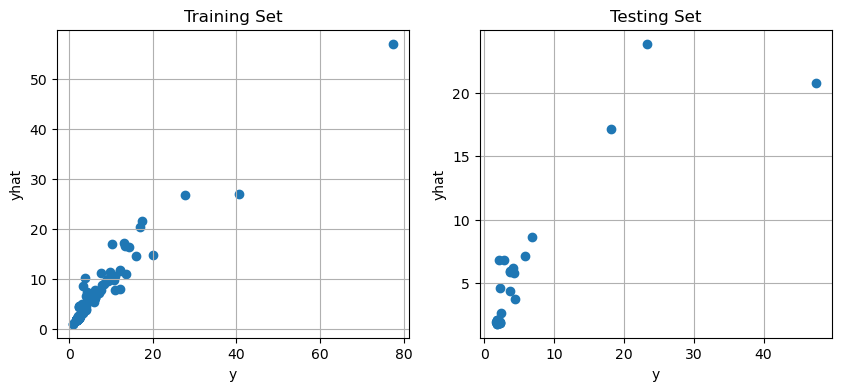

In [866]:
#Plotting the predictions
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y_test, y_pred_Test)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

In [867]:
#Training Metrics
print('TRAINING METRICS:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))
print(' ')
#Testing Metrics
print('TESTING METRICS:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

TRAINING METRICS:
R squared: 0.9057756287523944
Mean Absolute Error: 0.6244994976063636
Mean Squared Error: 4.185169078449903
Root Mean Squared Error: 2.0457685789086466
 
TESTING METRICS:
R squared: 0.7052841958264129
Mean Absolute Error: 1.0217391410618182
Mean Squared Error: 14.250587684925598
Root Mean Squared Error: 3.774995057602804


# Multiple Runs of the Model

In [868]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

In [869]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [870]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [871]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

Test Metrics:
R squared: 0.7576883650115475
Mean Absolute Error: 0.9292459212909091
Mean Squared Error: 11.716654324539613
Root Mean Squared Error: 3.422959877728574


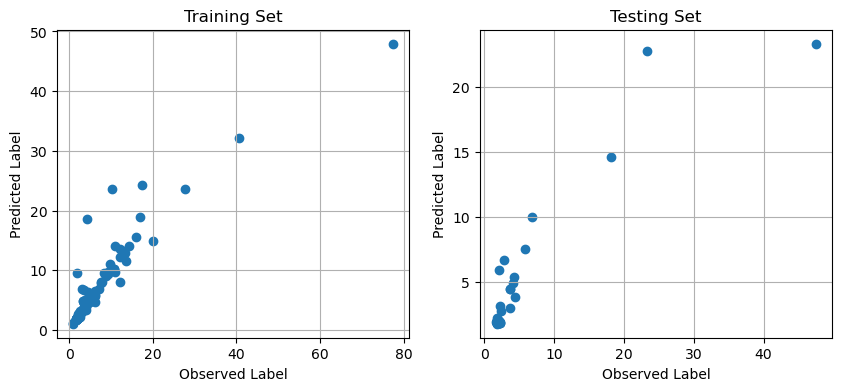

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 31.43it/s]


Train MSE median: 5.575678909858889
Test MSE median: 19.35702447764912

Train_R2 median: 0.8906351582777876
Test_R2 median: 0.22845137941912114


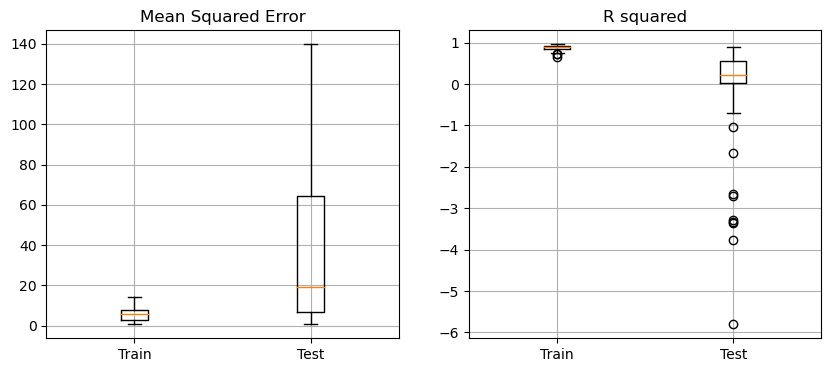

Train MSE standard deviation: 3.146973655669073
Test MSE standard deviation:  41.085299223060844

Train_R2 standard deviation: 0.057281280998346805
Test_R2 standard deviation:  1.089597159044074


In [872]:
#model = KNeighborsRegressor(n_neighbors=100)
model = RandomForestRegressor(n_estimators=10) #Number of trees in the forest
#model = ExtraTreesRegressor(n_estimators=10)
#model = GradientBoostingRegressor(n_estimators = 10) #Number of trees in the forest
#model = XGBRegressor(objective="reg:squarederror", random_state=42)
#model = CatBoostRegressor() #Change fit in functions
#model = LGBMRegressor() #Change fit in functions

#Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model,X_train_st,y_train,X_test_st, y_test)

100%|███████████████████████████████████████████| 24/24 [00:00<00:00, 38.46it/s]


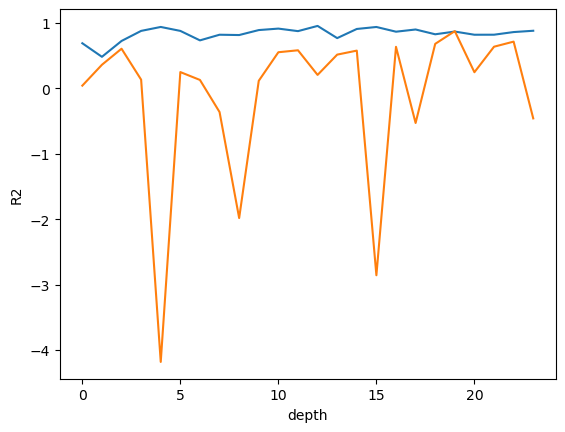

In [873]:
train_R2 =[]
test_R2=[]

for estimators in tqdm(range(1,25)):
    X_train_st, X_test_st, y_train, y_test = train_test_split(X,y,test_size=0.2) 
    RegForest = RandomForestRegressor(n_estimators=estimators)
    RegForest.fit(X_train_st,y_train)
    y_pred_Train = RegForest.predict(X_train_st) 
    y_pred_Test = RegForest.predict(X_test_st) 
    
    train_R2.append(metrics.r2_score(y_train,y_pred_Train))
    test_R2.append(metrics.r2_score(y_test, y_pred_Test))

plt.plot(train_R2)
plt.plot(test_R2)

plt.ylabel('R2')
plt.xlabel('depth')
plt.show()

<Axes: >

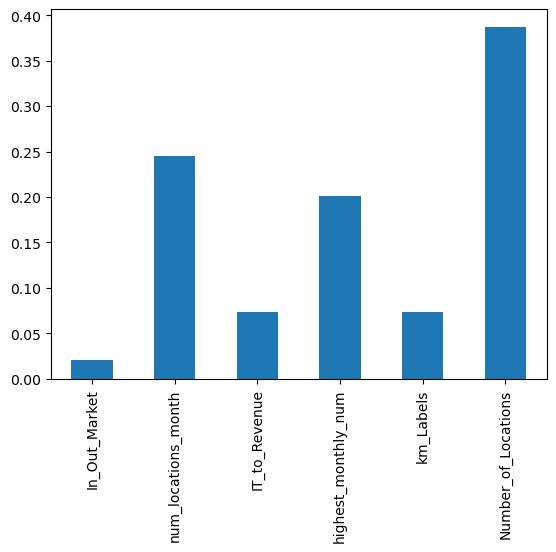

In [874]:
Feature_importances = pd.Series(model.feature_importances_, index=features)
Feature_importances.plot.bar()

# Predicting Number of Netrality Locations

In [925]:
#Splitting American customer data into features and labels
features2 = ['In_Out_Market','km_Labels','Number_of_Locations','Est_IT_Department_Budget_(in_000s_USD)','IT_to_Revenue']
X2 = americanBilling[features2]
y2 = americanBilling['num_locations_month']

In [926]:
#Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.20, random_state=2) 

In [927]:
mean2 = X2_train.mean()
print(mean2)

In_Out_Market                                  0.840909
km_Labels                                      2.413636
Number_of_Locations                           16.381818
Est_IT_Department_Budget_(in_000s_USD)    248617.081818
IT_to_Revenue                                  0.037740
dtype: float64


In [928]:
stdev2 = X2_train.std()
print(stdev2)

In_Out_Market                             3.665950e-01
km_Labels                                 2.026490e+00
Number_of_Locations                       3.149980e+01
Est_IT_Department_Budget_(in_000s_USD)    1.438827e+06
IT_to_Revenue                             1.674271e-02
dtype: float64


In [929]:
X2_train_st = (X2_train - mean2)/stdev2 

In [930]:
X2_test_st = (X2_test - mean2)/stdev2

In [931]:
#Training the Model
ForestReg2 = RandomForestRegressor(n_estimators=10)
ForestReg2.fit(X2_train_st, y2_train)

y2_pred_Train = ForestReg2.predict(X2_train_st) #Predictions on training set
y2_pred_Test = ForestReg2.predict(X2_test_st)   #Predictions on testing set

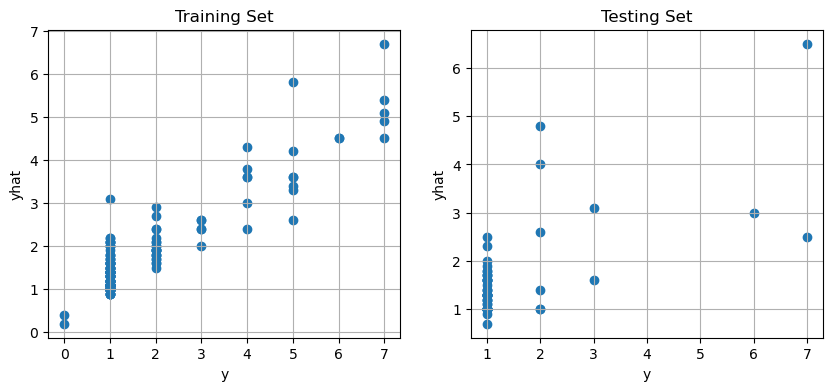

In [932]:
#Plotting the predictions
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y2_train, y2_pred_Train)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y2_test, y2_pred_Test)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

In [933]:
#Training Metrics
print('TRAINING METRICS:')
print('R squared:', metrics.r2_score(y2_train, y2_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_train, y2_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_train, y2_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_train, y2_pred_Train)))
print(' ')
#Testing Metrics
print('TESTING METRICS:')
print('R squared:', metrics.r2_score(y2_test, y2_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_Test)))

TRAINING METRICS:
R squared: 0.8066711460933
Mean Absolute Error: 0.32
Mean Squared Error: 0.3329090909090909
Root Mean Squared Error: 0.5769827474969168
 
TESTING METRICS:
R squared: 0.4073381696428572
Mean Absolute Error: 0.6163636363636364
Mean Squared Error: 1.0532727272727274
Root Mean Squared Error: 1.0262907615645418


<Axes: >

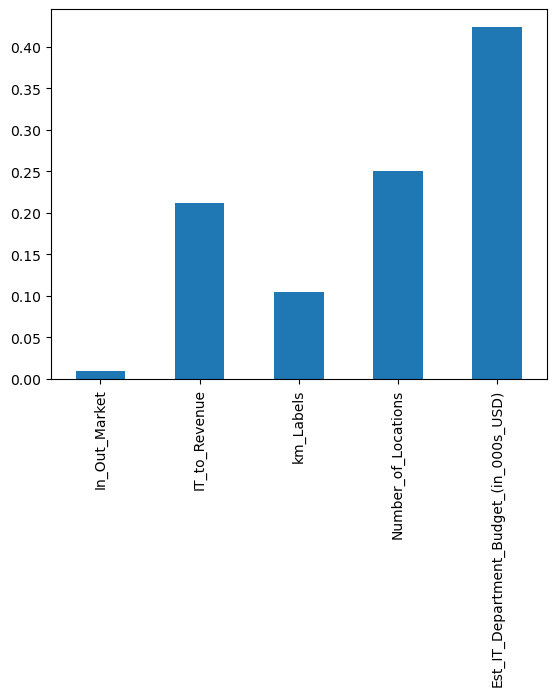

In [915]:
Feature_importances2 = pd.Series(ForestReg2.feature_importances_, index=features2)
Feature_importances2.plot.bar()